In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns


In [ ]:
# loading the excel file using path
path ='Online_Retail.xlsx'
df = pd.read_excel(path)

In [3]:
df.head(10) # first 10 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df = df.dropna(subset=['Description'])

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [6]:
df = df.dropna(subset=['CustomerID'])

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.duplicated().sum()

5225

In [9]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


# here we have noticed that unitprice has 0 and quality has negative value

In [12]:
df = df[(df['UnitPrice']>0) & (df['Quantity']>0)]

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


# we done all the data cleaning process

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


 
/* For the cohort analysis there are a few labels we need to create:

Billing period of InvoiceDate: String representation of the year and month of a single transaction/invoice.
Cohort Group: A string representation of the year and month of a customer’s first purchase. 
    This label is common to all invoices for a particular customer.
Cohort Period / Cohort Index: Full representation of a client’s stage in their “lifespan”. 
    The number represents the number of months since the first purchase.*/

In [15]:
def retre_month(x):
    return dt.datetime(x.year,x.month,1) #start date of 1st dec

In [16]:
df['invoice_month'] = df['InvoiceDate'].apply(retre_month)
df['invoice_month']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-01
541905   2011-12-01
541906   2011-12-01
541907   2011-12-01
541908   2011-12-01
Name: invoice_month, Length: 397884, dtype: datetime64[ns]

In [17]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01


# invoice for per customer

In [18]:
grouped = df.groupby('CustomerID')['invoice_month']
grouped

In [19]:
grouped_size = df.groupby('CustomerID')['invoice_month'].size()
grouped_size

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    756
18287.0     70
Name: invoice_month, Length: 4338, dtype: int64

In [20]:
df['cohortMonth'] = grouped.transform('min')
df['cohortMonth']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-08-01
541905   2011-08-01
541906   2011-08-01
541907   2011-08-01
541908   2011-08-01
Name: cohortMonth, Length: 397884, dtype: datetime64[ns]

In [21]:
def retre_month_int(dframe, column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month, day

In [22]:
invoice_year, invoice_month,_ = retre_month_int(df,'invoice_month')
cohort_year, cohort_month,_ = retre_month_int(df,'cohortMonth')

year_diff = invoice_year-cohort_year
month_diff = invoice_month-cohort_month

In [23]:
year_diff.head(10)


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [24]:
df['cohort_index'] = year_diff*12 +month_diff +1
df['cohort_index']

0         1
1         1
2         1
3         1
4         1
         ..
541904    5
541905    5
541906    5
541907    5
541908    5
Name: cohort_index, Length: 397884, dtype: int64

In [25]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_month,cohortMonth,cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5


In [26]:
grouped= df.groupby(['cohortMonth','cohort_index'])
grouped

In [27]:
cohort_data = grouped['CustomerID'].apply(pd.Series.nunique)
cohort_data

cohortMonth  cohort_index
2010-12-01   1               885
             2               324
             3               286
             4               340
             5               321
                            ... 
2011-10-01   2                86
             3                41
2011-11-01   1               323
             2                36
2011-12-01   1                41
Name: CustomerID, Length: 91, dtype: int64

In [28]:
cohort_data = cohort_data.reset_index()
cohort_data

,cohortMonth,cohort_index,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321
...,...,...,...
86,2011-10-01,2,86
87,2011-10-01,3,41
88,2011-11-01,1,323
89,2011-11-01,2,36


In [29]:
cohort_counts = cohort_data.pivot(index = 'cohortMonth', columns = 'cohort_index', values = 'CustomerID')
cohort_counts

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
cohort_size = cohort_counts.iloc[:,0]
cohort_size

cohortMonth
2010-12-01    885.0
2011-01-01    417.0
2011-02-01    380.0
2011-03-01    452.0
2011-04-01    300.0
2011-05-01    284.0
2011-06-01    242.0
2011-07-01    188.0
2011-08-01    169.0
2011-09-01    299.0
2011-10-01    358.0
2011-11-01    323.0
2011-12-01     41.0
Name: 1, dtype: float64

In [31]:
retention = cohort_counts.divide(cohort_size, axis=0) #axis=0 to ensure the divide along the row axis 
retention

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02-01,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03-01,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04-01,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
retention.round(3) * 100 #to show the number as percentage

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


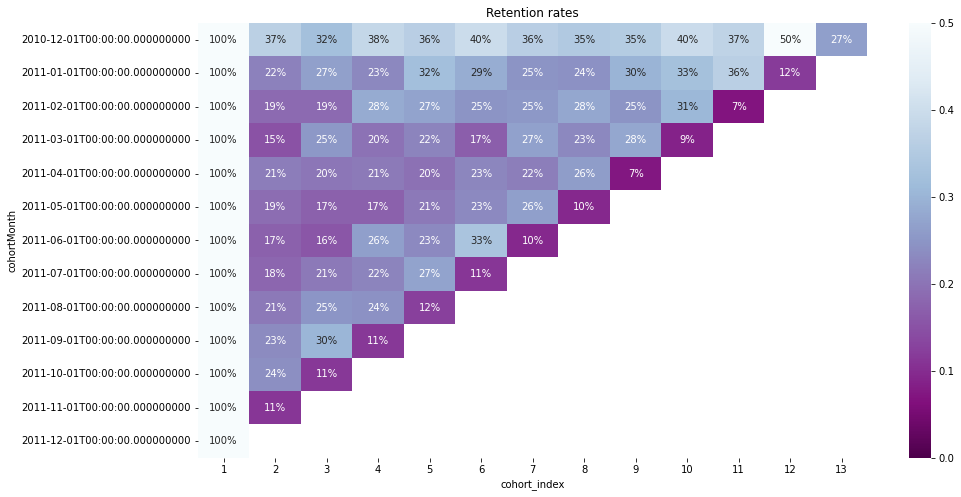

In [33]:
#Build the heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention, annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

In [34]:
#Average quantity for each cohort
grouped = df.groupby(['cohortMonth', 'cohort_index'])

grouped.size()

cohortMonth  cohort_index
2010-12-01   1               26157
             2               10188
             3                8777
             4               11267
             5                9728
                             ...  
2011-10-01   2                3583
             3                 885
2011-11-01   1               11199
             2                1130
2011-12-01   1                 984
Length: 91, dtype: int64

In [35]:
cohort_data = grouped['Quantity'].mean()

In [36]:
cohort_data


cohortMonth  cohort_index
2010-12-01   1               11.938105
             2               15.573125
             3               15.593027
             4               15.760628
             5               13.505140
                               ...    
2011-10-01   2                7.154898
             3                8.359322
2011-11-01   1                7.718457
             2                9.800000
2011-12-01   1               14.876016
Name: Quantity, Length: 91, dtype: float64

In [37]:
cohort_data = cohort_data.reset_index()
cohort_data

,cohortMonth,cohort_index,Quantity
0,2010-12-01,1,11.938105
1,2010-12-01,2,15.573125
2,2010-12-01,3,15.593027
3,2010-12-01,4,15.760628
4,2010-12-01,5,13.505140
...,...,...,...
86,2011-10-01,2,7.154898
87,2011-10-01,3,8.359322
88,2011-11-01,1,7.718457
89,2011-11-01,2,9.800000


In [38]:
average_quantity = cohort_data.pivot(index='cohortMonth',columns ='cohort_index',values ='Quantity' )
average_quantity.round(1)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohortMonth,,,,,,,,,,,,,
2010-12-01,11.9,15.6,15.6,15.8,13.5,14.8,16.0,15.5,18.1,17.6,18.9,13.4,15.3
2011-01-01,17.2,13.3,12.6,15.1,12.8,15.3,14.9,14.8,11.6,10.5,9.4,10.0,NaN
2011-02-01,11.1,13.5,19.0,12.0,12.3,12.3,13.5,13.3,10.9,12.3,13.4,NaN,NaN
2011-03-01,9.9,11.7,13.3,10.1,14.3,13.0,13.4,13.7,11.2,9.5,NaN,NaN,NaN
2011-04-01,10.0,10.4,9.8,11.8,11.8,8.6,9.9,9.5,7.4,NaN,NaN,NaN,NaN
2011-05-01,11.3,9.6,14.1,12.8,11.1,8.7,10.6,109.9,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,14.5,10.8,13.5,10.6,9.8,9.4,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.8,13.8,7.3,8.1,6.1,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.0,6.2,5.4,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
average_quantity.index = average_quantity.index.date

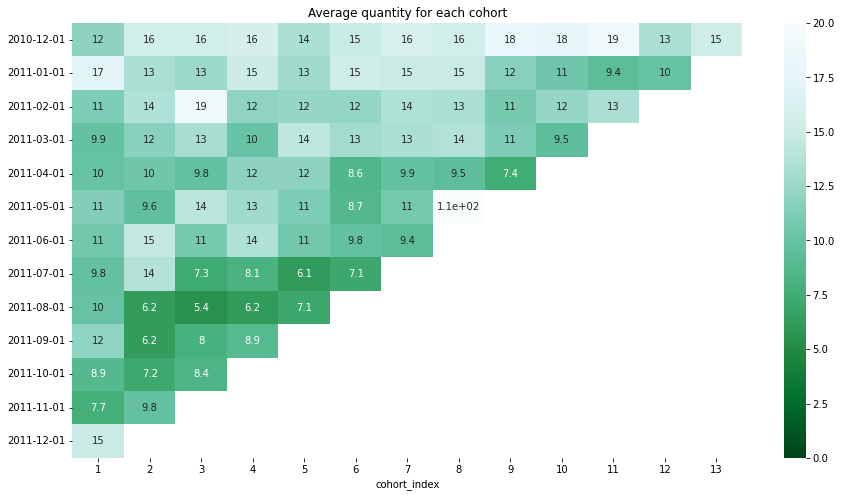

In [40]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()

In [ ]:
df.to_csv('my_cohort_Final.csv')